<h1 style="text-align:center;font-size:200%;;">Salary Prediction📊</h1> 

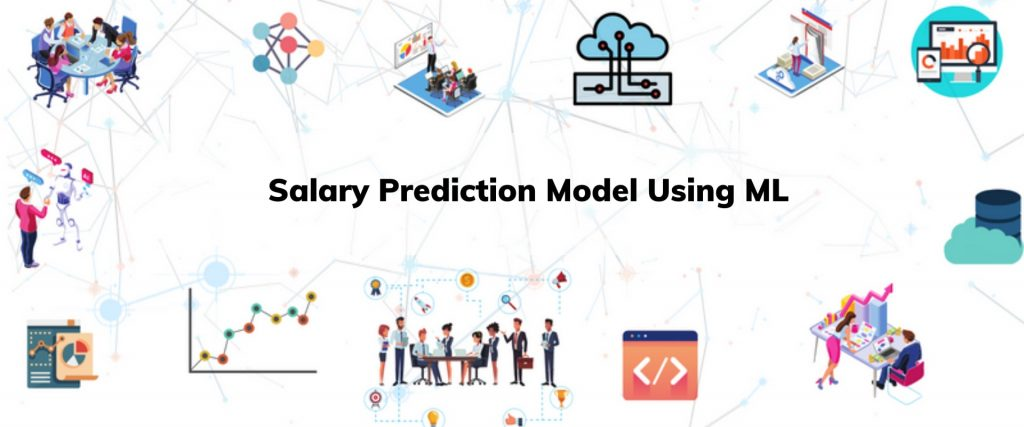

# In this we will predict the salary of data scientist, data analyst, machine learning engineer in cities of USA 

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1. [Glance of Analysis](#1)


2. [Import libraries & Data](#2)


3. [Basic Analysis](#3)


4. [Description of Data & Functions](#4)


5. [Scrutiny of Data](#5)

    -[Taking only the rows with salary and eliminating others](#5.1)
    
    -[Dealing with Salary](#5.2)
    
    -[Splitting into min and max salaries](#5.3)
    
    -[Extracting Company Name text](#5.4)
    
    -[Separating State from location](#5.5)
    
    -[Comparing the location of job state with headquarter's state](#5.6)
    
    -[Company's Age](#5.7)


6. [Job Description Parsing](#6)
    
    -[Searching with the relevant skills like](#6.1)
    
    -[Simple JOB titles and Seniority level](#6.2)
    
    -[JOB description Length](#6.3)
    
    -[Competitors count](#6.4)
    
    -[Hourly salary converting to Annual package](#6.5)


7. [Storing into cleaned csv](#7)


8. [Exploratory data analysis](#8)


9. [Graphical Representation](#9)
    
    -[Correlation](#9.1)
    
    -[univariate analysis](#9.2)
    
    -[Pivot tables](#9.3)


10. [Model Building](#10)
    
    -[Considering only the required columns](#10.1 )   
    
    -[Dummies creation](#10.2)
    
    -[Model Deployment](#10.3)


11. [Tuning Parameters Using GridSearchCV](#11)


12. [Final prediction](#12)


13. [Summary](#13)

    

    
    
 

# Glance of Analysis <a class="anchor" id="1"></a>
[Table of content](#0.1)


Salary prediction According to the relevant jobs which will give inshights of the current .Also This project is going to the  eye-opener those who create myths for the salary . In this projects we had taken data from kaggle to be specific this data is taken from glassdoors site's .We had done proper scrutiny of data made pivot table for eassy to understand also sort data which is relevant for this projects .In this data we are going to predict salary of Analytics Field related like data scientist, data analyst ,data engineers etc.The purpose of this project is to use data transformation and machine learning to create a model that will predict a salary when given , Domains ,years of experience, job type etc.The model was only developed to find the accuracy of the projects otherwise main crux was shown in the pivots and the flow charts.This model can be used as a guide when determining salaries since it shows reasonable predictions when given information of relevent job type. 




## Import Libraries & Data <a class="anchor" id="2"></a>
[Table of content](#0.1)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
os.chdir("F:\projects")

## Basic Analysis<a class="anchor" id="3"></a>
[Table of content](#0.1)

In [6]:
data=pd.read_csv("glassdoor_jobs.csv")

## Description of Data & Functions<a class="anchor" id="4"></a>
[Table of content](#0.1)

022

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


Above cell is telling the basic information about data like null values , object columns , non object columns range of data etc

In [8]:
data.shape

(956, 15)

We have good amount of data .Where over 956 of records Which divided into 15 columns

In [9]:
data.dtypes[df.dtypes=="object"].count()

12

In [10]:
data.dtypes[df.dtypes!="object"].count()

3

As we saw that in above two columns their are 12 object type and 3 numeric type of columns in our dataset , Thier are lots of columns . Which are not relevent for our problem so, we can drop them later.

In [11]:
data.duplicated().sum()

0

As their is no value which is overlaping in dataset

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


Above cell will tell the breif about dataset & variable it will show mean , min , median , max ,null-value count etc, of a particular variable With the help of above column we can also found the Inter Quartile Range(IQR) by Subtracting 75%(q3) - 25%(q1) by IQR we also found outliers in our dataset.

## Scrutiny of Data<a class="anchor" id="5"></a>
[Table of content](#0.1)

In [3]:
# Dropping Columns 
# data = data.drop('Unnamed: 0', axis=1)

### Taking only the rows with salary and eliminating others<a class="anchor" id="5.1"></a>
[Table of content](#0.1)

In [13]:
data = data[data['Salary Estimate'] != '-1']

Above cell said that we are taking only those rows where salary is above -1 

### Dealing with Salary <a class="anchor" id="5.2"></a>
[Table of content](#0.1)

In [14]:
data['hourly_pay'] = data['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0 )
data['employer_prov'] = data['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0 )

In above cell we extracted hourly payment of the employee also make employer prov columns

In [15]:
salary = data['Salary Estimate'].apply(lambda x: x.split('(')[0])
k_dollar_rep = salary.apply(lambda x: x.replace('K', '').replace('$', ''))
salary_range = k_dollar_rep.apply(lambda x: x.replace('Per Hour', '').replace('Employer Provided Salary:',''))

In this data we remove all the special character which are diffrentiating the data also added two two cells K_dollar_rep & salary_range

#### Splitting into min and max salaries<a class="anchor" id="5.3"></a>
[Table of content](#0.1)

In [16]:
data['min_sal'] = salary_range.apply(lambda x: int(x.split('-')[0]))
data['max_sal'] = salary_range.apply(lambda x: int(x.split('-')[1]))
data['avg_sal'] = (data.min_sal + data.max_sal)/2

In the above cell we can easyliy identify the minimum, maximum & average salary according to the sectors

## Extracting Company Name text<a class="anchor" id="5.4"></a>
[Table of content](#0.1)

In [17]:
data['company'] = data.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-4], axis = 1)
# data.company.head()

Above cell is identifing the ratings of the particular company by which we could identify value of company  

## Separating State from location<a class="anchor" id="5.5"></a>
## Comparing the location of job state with headquarter's state
[Table of content](#0.1)

In [18]:
# data.Location.head()

In [19]:
data['cities'] = data['Location'].apply(lambda x: x.split(', ')[0])
data['job_states'] = data['Location'].apply(lambda x: x.split(', ')[1])
# data.states.value_counts() # We have one unique abbrevated state as Los Angeles
data['job_states'] = data['job_states'].apply(lambda x: 'LA' if x =='Los Angeles' else x)
# data.states.value_counts()

In [20]:
# data.Headquarters.head()

### If you want same state only use this

In [21]:
# data['headquartes_state'] = data['Headquarters'].apply(lambda x: x.split(', ')[-1])
# print(data.job_states.head())
# print(data['headquartes_state'].head())
# data['same_state'] = data.apply(lambda x: 1 if x.job_states == x.headquartes_state else 0, axis =1)
# data.same_state.head()

### If you want both city and state to be same use this

In [22]:
data['same_state'] = data.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

# Company's Age<a class="anchor" id="5.7"></a>
[Table of content](#0.1)

We will decide its age using current year subtracted from founded year

In [23]:
data['age'] = data['Founded'].apply(lambda x: x if x<1 else 2020-x )

# Job Description Parsing<a class="anchor" id="6"></a>
[Table of content](#0.1)
### Searching with the relevant skills like
#### Python, R, R studio, AWS, Spark, Excel
If you want more you can add

In [24]:
# print(data.columns)
# print(data.shape)

In [25]:
# yn is yes(1) or no(0) 
# Python
data['python_yn'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
# print('Python count:\n',data.python_yn.value_counts())

# R studio
data['Rstudio_yn'] = data['Job Description'].apply(lambda x: 1 if ('r studio' in x.lower() or 'r-studio' in x.lower()) else 0)
# print('R or R studio count:\n',data.Rstudio_yn.value_counts())

# Excel
data['excel_yn'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
# print('Excel count:\n',data.excel_yn.value_counts())

# AWS
data['aws_yn'] = data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
# print('AWS count:\n',data.aws_yn.value_counts())

# Spark
data['spark_yn'] = data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
# print('Spark count:\n',data.spark_yn.value_counts())

## Simple JOB titles and Seniority level<a class="anchor" id="6.2"></a>
[Table of content](#0.1)

In [26]:
# dict(data['Job Title'].value_counts())

In [27]:
def title_simp(title):
    '''Makes the given below set of jobs as title other that these will be nil which can later changed'''
    
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle' #Machine Learning Engineer
    elif 'manager' in title.lower():
        return 'manager' 
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
def seniority(title):
    '''Considers only senior and junior if any other then returns NaN can be changed later'''
    
    seniors = ['senior', 'sr', 'lead', 'principal']
    
    for senior in seniors:
        if senior in title.lower():
            return 'sr'
    if 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [28]:
data['job_simp'] = data['Job Title'].apply(title_simp)
data['seniority_lvl'] = data['Job Title'].apply(seniority)

data.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [29]:
# data.seniority_lvl.value_counts()

### JOB description Length<a class="anchor" id="6.3"></a>
[Table of content](#0.1)

Created new column of length of job description

In [30]:
data['job_des'] = data['Job Description'].apply(lambda x: len(x))
# data.job_des

### Competitors count<a class="anchor" id="6.4"></a>
[Table of content](#0.1)

In [31]:
# data.Competitors.value_counts()

In [32]:
data['comp_num'] = data['Competitors'].apply(lambda x: 0 if x == 0 else len(x.split(',')))

In [33]:
data.comp_num.value_counts()

1    472
3    228
2     41
4      1
Name: comp_num, dtype: int64

### Hourly salary converting to Annual package<a class="anchor" id="6.5"></a>
[Table of content](#0.1)

Assume that all data enthusiast work around 50 hours per week

In [34]:
data['min_sal'] = data.apply(lambda x: (x.min_sal*50*52)/1000 if x.hourly_pay == 1 else x.min_sal, axis=1)
data['max_sal'] = data.apply(lambda x: (x.max_sal*50*52)/1000 if x.hourly_pay == 1 else x.max_sal, axis=1)

In [35]:
data.to_csv('Salary_cleaned.csv', index=False)

## Storing into cleaned csv 
## Next is EDA<a class="anchor" id="7"></a>
[Table of content](#0.1)

In [36]:
df = pd.read_csv('Salary_cleaned.csv')

In [37]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,Rstudio_yn,excel_yn,aws_yn,spark_yn,job_simp,seniority_lvl,job_des,comp_num
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,1,0,0,data scientist,na,2536,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,1,0,0,data scientist,na,2728,3


In [38]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly_pay,employer_prov,min_sal,max_sal,avg_sal,same_state,age,python_yn,Rstudio_yn,excel_yn,aws_yn,spark_yn,job_des,comp_num
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,75.110243,128.729380,100.626011,0.557951,46.591644,0.528302,0.002695,0.522911,0.237197,0.225067,3869.545822,1.673854
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.643742,44.496172,38.855948,0.496965,53.778815,0.499535,0.051882,0.499812,0.425651,0.417908,1521.495868,0.918451
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,53.250000,96.250000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,70.000000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,1.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


## Graphical Representation<a class="anchor" id="9"></a>
[Table of content](#0.1)

In [39]:
# Lets see the distribution of all and consider which for hist and to normalize
# df.hist()

Histogram of  Rating


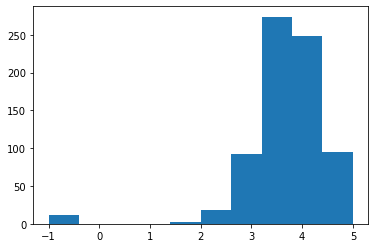

Histogram of  age


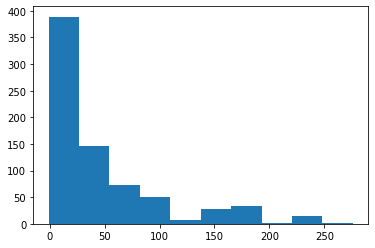

Histogram of  avg_sal


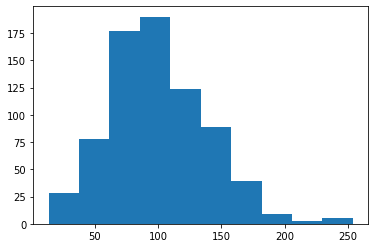

Histogram of  job_des


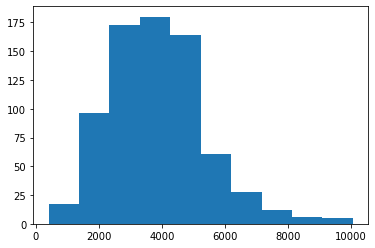

In [40]:
# Hist plot for visualizing distribution
hist_ls = ['Rating', 'age', 'avg_sal', 'job_des']
for feature in hist_ls:
    print('Histogram of ', feature)
    plt.hist(df[feature])
    plt.show()

### Analysis from Histograms
job_des, avg_sal, Rating, age - Normally distributed

age - Requires scaling or Normalization

## Box plots
[Table of content](#0.1)

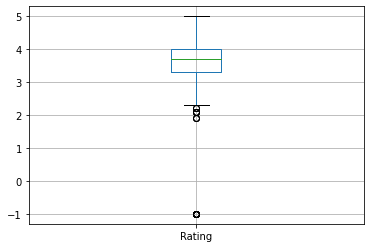

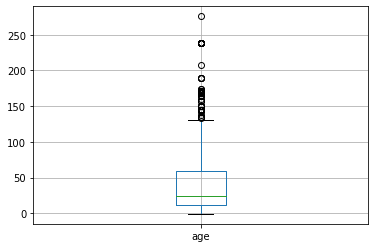

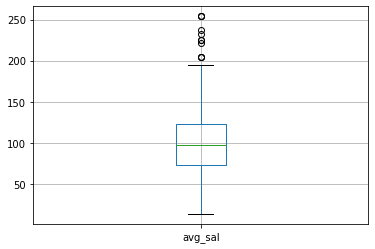

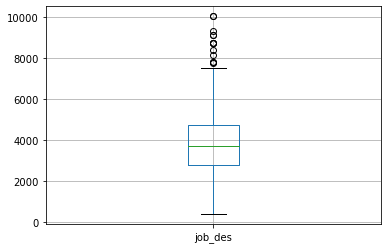

In [41]:
# cols = df.select_dtypes(include=np.number).columns.tolist() # use this visualize and take only the needed ones
cols = ['Rating', 'age', 'avg_sal', 'job_des']
for col in cols:
    df.boxplot(column= col)
    plt.show()

### Analysis of Box plot
Rating, age, avg_sal, job_des - all have outliers and to be go for scaling


# Correlation<a class="anchor" id="9.1"></a> 
[Table of content](#0.1)

In [42]:
df[['Rating', 'age', 'avg_sal', 'job_des', 'comp_num']].corr()

,Rating,age,avg_sal,job_des,comp_num
Rating,1.000000,0.021655,0.013492,-0.012281,0.021395
age,0.021655,1.000000,0.019655,0.163911,0.137517
avg_sal,0.013492,0.019655,1.000000,0.078808,0.088790
job_des,-0.012281,0.163911,0.078808,1.000000,0.109321
comp_num,0.021395,0.137517,0.088790,0.109321,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Rating'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'avg_sal'),
  Text(0, 3.5, 'job_des'),
  Text(0, 4.5, 'comp_num')])

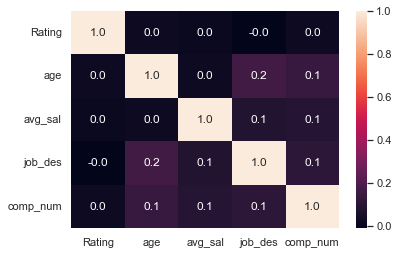

In [43]:
sns.set()
sns.heatmap(df[['Rating', 'age', 'avg_sal', 'job_des', 'comp_num']].corr(), annot=True, fmt='.1f')
plt.yticks(rotation = 0)

# Categorical Features 
## Univariate Analysis<a class="anchor" id="9.2"></a>
[Table of content](#0.1)

In [44]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company', 'cities', 'job_states', 'same_state', 'python_yn',
       'Rstudio_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp',
       'seniority_lvl']]

## Bar plots

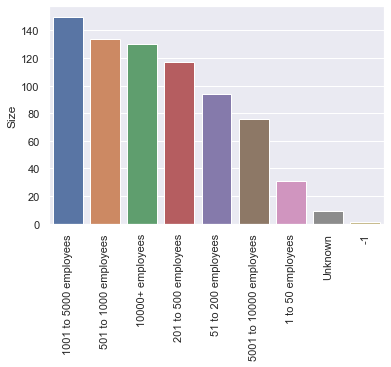

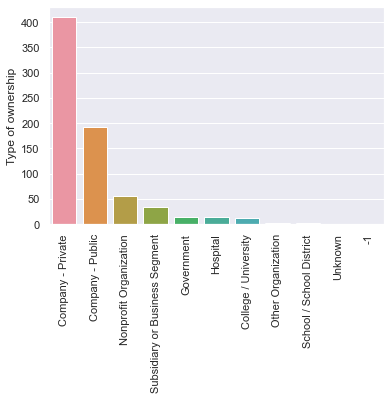

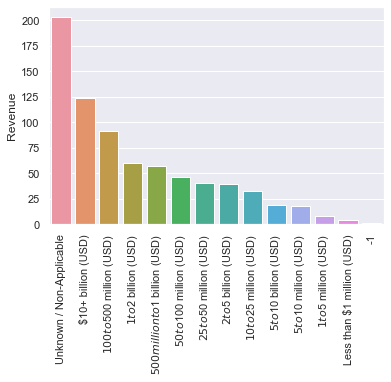

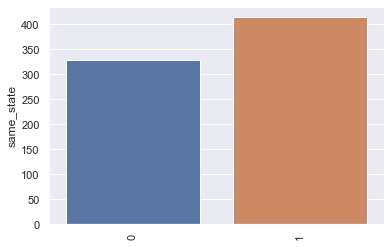

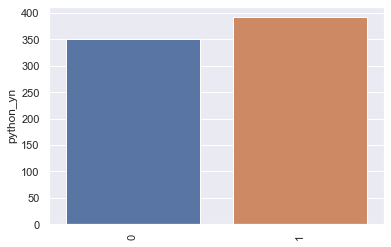

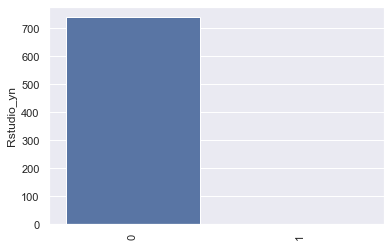

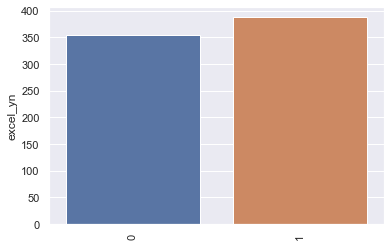

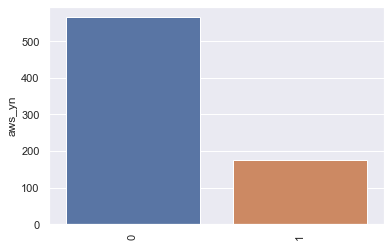

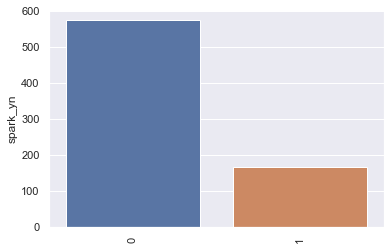

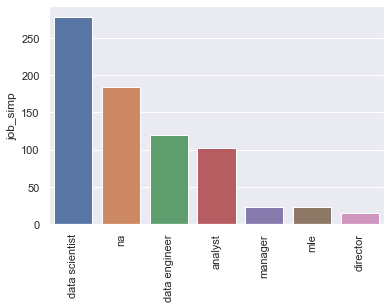

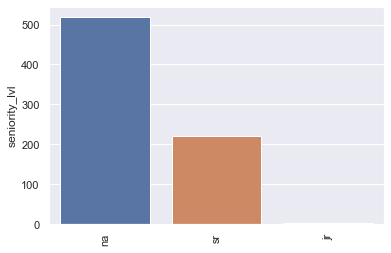

In [45]:
for feature in df_cat.columns:
    if len(df[feature].unique()) < 15:
        count = df[feature].value_counts()
    #     print('Plot for {} total : {}'.format(feature, len(count)))
        sns.barplot(x=count.index , y= count, data = df)
        plt.xticks(rotation=90)
        plt.show()

### Bar plots of first 15  for features with more unique values

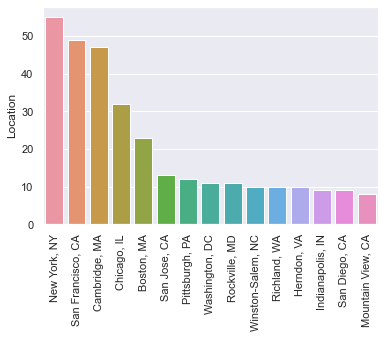

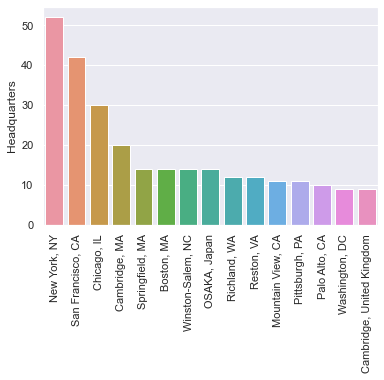

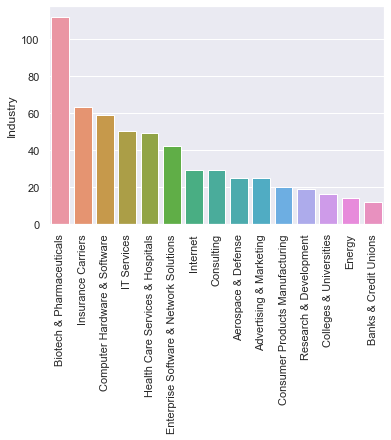

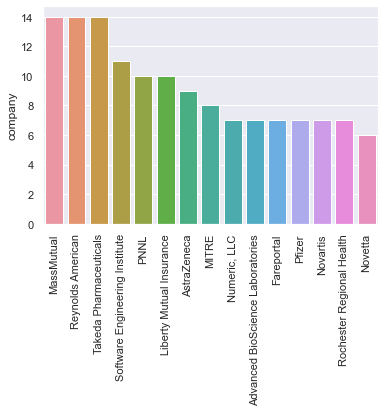

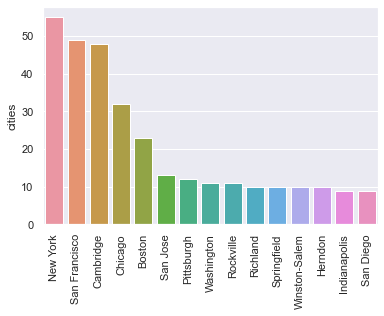

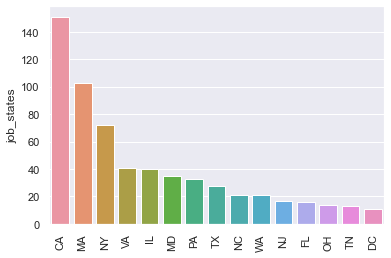

In [46]:
for feature in df_cat[['Location', 'Headquarters', 'Industry', 'company', 'cities', 'job_states']].columns:
    count = df[feature].value_counts()[:15] # We can just view the Top 15 in all Series
#     print('Plot for {} total : {}'.format(feature, len(count)))
    sns.barplot(x=count.index , y= count, data = df)
    plt.xticks(rotation=90)
    plt.show()  

## Pivot tables <a class="anchor" id="9.3"></a>
[Table of content](#0.1)


In [47]:
# Using pivot_table() function
pd.pivot_table(df, index='job_simp', values='avg_sal')

,avg_sal
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [48]:
# Avg salary based on job title and the seniority level
pd.pivot_table(df, index=['job_simp', 'seniority_lvl'], values='avg_sal')

avg_sal
job_simp       seniority_lvl            
analyst        jr              53.250000
               na              61.308219
               sr              79.092593
data engineer  na              96.701220
               sr             124.689189
data scientist jr             106.500000
               na             107.043011
               sr             138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               sr             142.071429
na             na              73.988189
               sr             109.061404

In [49]:
# Checking for data scientist avg salary per state
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_states', values='avg_sal').sort_values('avg_sal', ascending=False)

,avg_sal
job_states,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


# Model Building<a class="anchor" id="10"></a>
[Table of content](#0.1)

In [50]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,Rstudio_yn,excel_yn,aws_yn,spark_yn,job_simp,seniority_lvl,job_des,comp_num
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,1,0,0,data scientist,na,2536,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,1,0,0,data scientist,na,2728,3


In [51]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly_pay', 'employer_prov', 'min_sal', 'max_sal', 'avg_sal',
       'company', 'cities', 'job_states', 'same_state', 'age', 'python_yn',
       'Rstudio_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp',
       'seniority_lvl', 'job_des', 'comp_num'],
      dtype='object')

# Considering only the required columns<a class="anchor" id="10.1"></a>
[Table of content](#0.1)

In [52]:
train = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly_pay', 'employer_prov',
       'company', 'cities', 'job_states', 'same_state', 'age', 'python_yn',
       'Rstudio_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp',
       'seniority_lvl', 'job_des', 'comp_num']]

#  Dummies creation<a class="anchor" id="10.2"></a>
[Table of content](#0.1)

In [53]:
X = pd.get_dummies(train)
X.shape

(742, 716)

In [54]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Columns: 716 entries, Rating to seniority_lvl_sr
dtypes: float64(1), int64(11), uint8(704)
memory usage: 579.8 KB


In [55]:
y = df['avg_sal']

In [56]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [57]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

## Model Deployment<a class="anchor" id="10.3"></a>
[Table of content](#0.1)

In [58]:
model = RandomForestRegressor(n_estimators=140)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=140)

In [59]:
prediction = model.predict(X_test)

In [60]:
mean_absolute_error(y_test, prediction)

11.103187919463089

In [61]:
accuracy = model.score(X_test, y_test)
round(accuracy*100, 2)

79.3

# Tuning Parameters Using GridSearchCV<a class="anchor" id="11"></a>
[Table of content](#0.1)

In [62]:
# parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

# gs = GridSearchCV(model,parameters,scoring='neg_mean_absolute_error',cv=3)
# gs.fit(X_train,y_train)

# gs.best_score_

In [63]:
# gs.best_estimator_

# Final prediction<a class="anchor" id="12"></a>
[Table of content](#0.1)

In [64]:
model = RandomForestRegressor(n_estimators=140)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [65]:
accuracy = model.score(X_test, y_test)
round(accuracy*100, 2)

79.75

## summary<a class="anchor" id="13"></a>
[Table of content](#0.1)

We had done the Analysis the experience of doing the project is great many new things are learned by me.We developed a model which is giving the accuracy of 80%.This model can be used as a guide when determining salaries since it leads to reasonable predictions when given information on Job Title,Salary Estimate,Ratings,compay name , location , competitors,sector, location etc.We also done analysis on the basis of sub-categoies which can't be ignored like skills, loction etc. this will help to candidate to keep on learning according to the need job.Having right knowlage for a particular job has always increase your salary need of the arc is to be proficient in yur job.